In [124]:
import numpy as np
import pandas as pd

In [125]:
df = pd.read_csv('./spam.csv',encoding = "ISO-8859-1")

In [126]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2412,spam,I don't know u and u don't know me. Send CHAT ...,NaN,NaN,NaN
2179,ham,And popping &lt;#&gt; ibuprofens was no help.,NaN,NaN,NaN
3037,ham,You are not bothering me but you have to trust...,NaN,NaN,NaN
4936,ham,G wants to know where the fuck you are,NaN,NaN,NaN
4342,ham,Its a valentine game. . . send dis msg to all ...,NaN,NaN,NaN


In [127]:
df.shape

(5572, 5)

In [128]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [130]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [131]:
df.sample(5)

,v1,v2
4963,spam,Dear Voucher holder Have your next meal on us....
3638,ham,Wat's da model num of ur phone?
3960,ham,Your dad is back in ph?
1913,ham,You want to go?
1915,ham,Its not that time of the month nor mid of the ...


In [132]:
# ranaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [133]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [135]:
df['target'] = encoder.fit_transform(df['target'])

In [136]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [137]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [138]:
# check for duplicate values
df.duplicated().sum()

403

In [139]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [140]:
df.duplicated().sum()

0

In [141]:
df.shape

(5169, 2)

## 2. EDA

In [142]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

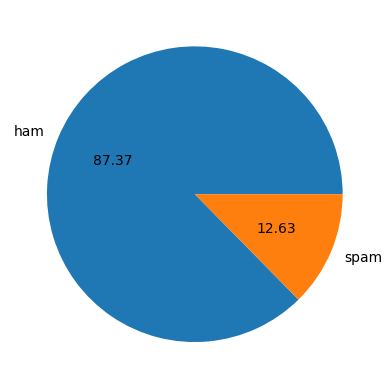

In [143]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [144]:
# Data is imbalanced

In [145]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [146]:
import nltk

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
df['num_characters'] = df['text'].apply(len) # number of characters in the text col for each row

In [149]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [150]:
# num of words
df['text'].apply(lambda txt: nltk.word_tokenize(txt))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [151]:
df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [152]:
df['num_words'] = df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

In [153]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [154]:
df['text'].apply(lambda txt: nltk.sent_tokenize(txt))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [155]:
df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [156]:
df['num_sentences'] = df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

In [157]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [158]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [159]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [160]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [161]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [162]:
# histograms
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

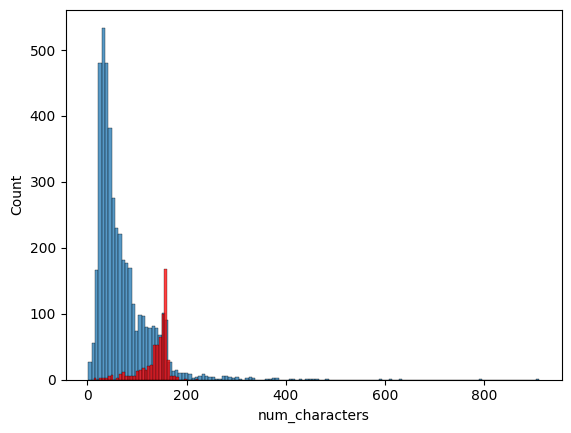

In [163]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

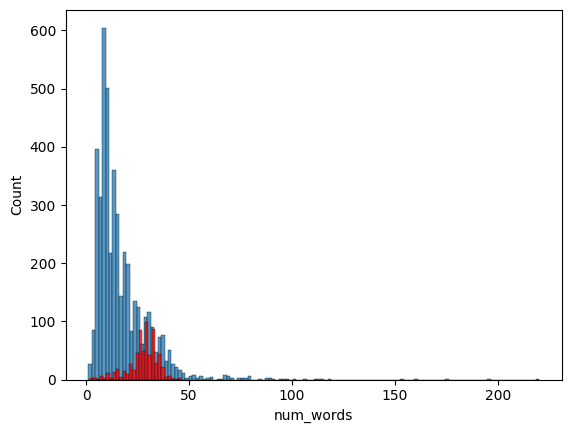

In [164]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

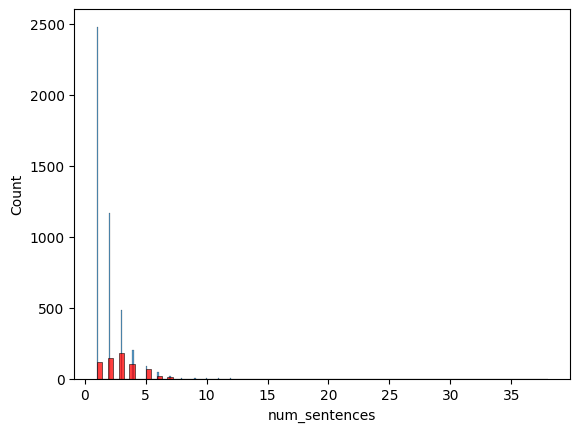

In [165]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

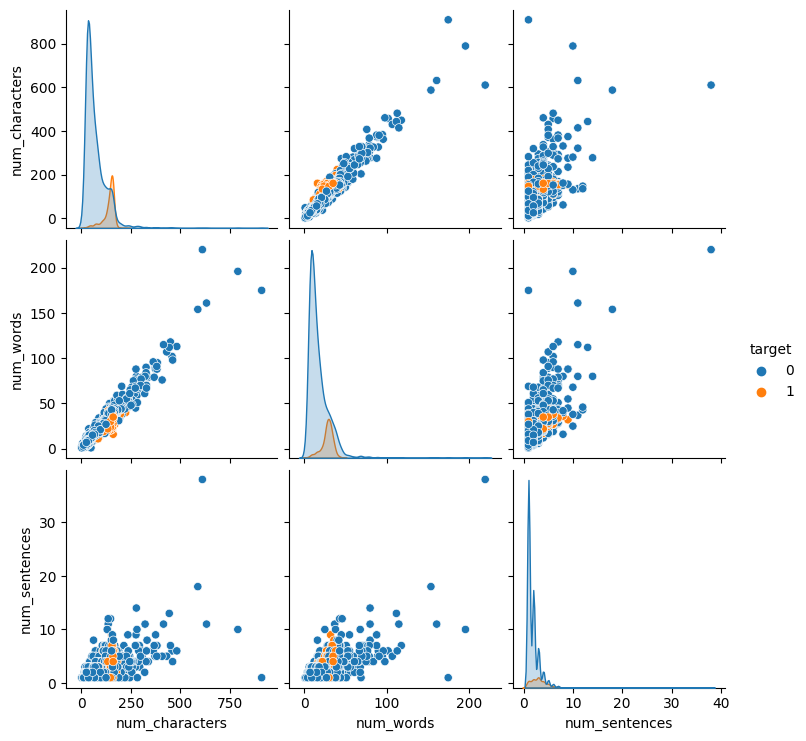

In [166]:
sns.pairplot(df, hue='target')

In [167]:
except_text = df.drop(columns='text')
except_text.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [168]:
except_text.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

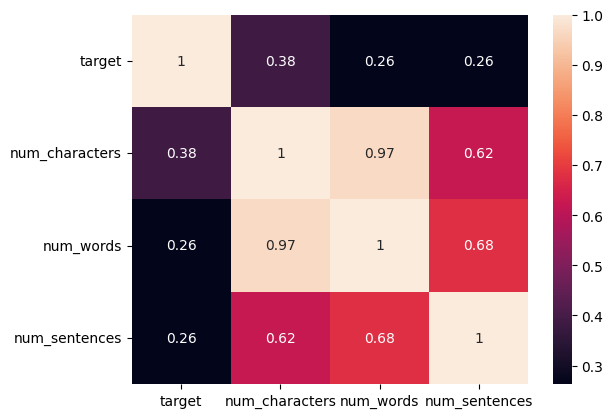

In [169]:
sns.heatmap(except_text.corr(), annot=True)

In [170]:
# Observations
# num_characters have the highest correlation with target ie. 0.38
# so we will keep num_characters and drop num_words and num_sentences

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Remove stop words and punctuation
- Stemming

In [171]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [173]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [174]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('dancing'))
print(ps.stem('loving'))

danc
love


In [175]:


def transform_text(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    return text

In [176]:
text = 'Hi how Are you? my friend Rahul You got a 20% raise'
print(text)
transform_text(text)

Hi how Are you? my friend Rahul You got a 20% raise


['hi', 'friend', 'rahul', 'got', '20', 'rais']

In [177]:
transform_text('Did you like my presentation on ML?')

['like', 'present', 'ml']

In [178]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

['love', 'yt', 'lectur', 'machin', 'learn']

In [179]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [180]:
transform_text(df['text'][0])

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [181]:
df['transformed_text'] = df['text'].apply(transform_text)

In [182]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [183]:
df['transformed_text'].describe()

count     5169
unique    5094
top         []
freq         9
Name: transformed_text, dtype: object

In [184]:

spam_concatenated_text = " ".join(np.concatenate(df[df['target'] == 1]['transformed_text'].values))


In [185]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [186]:
# word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,background_color='white')


In [187]:
test_wc = wc.generate("Your text goes here wooho we changed the world")

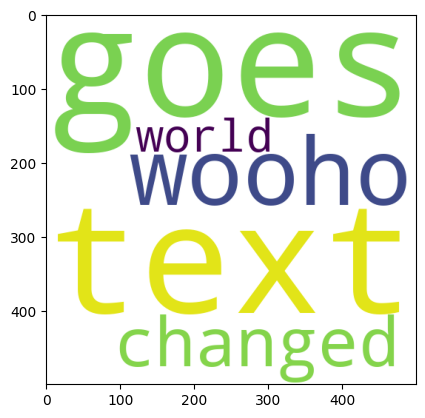

In [188]:
plt.imshow(test_wc)

In [189]:
spam_wc = wc.generate(spam_concatenated_text)

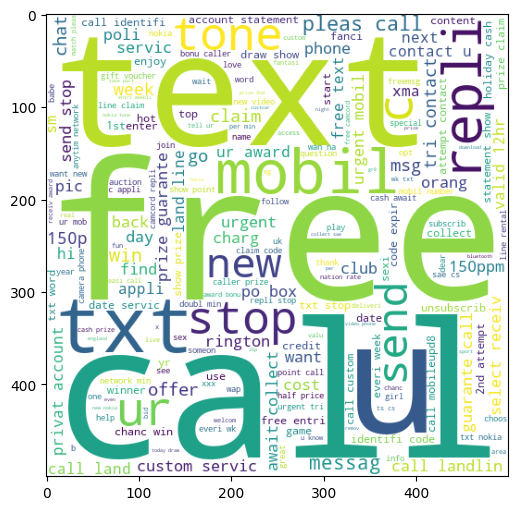

In [190]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

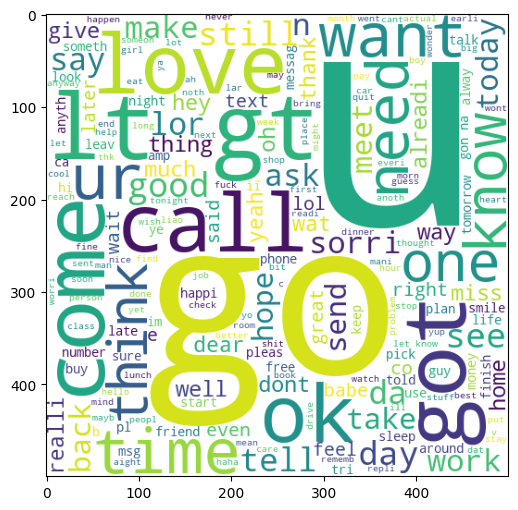

In [191]:
ham_concatenated_text = " ".join(np.concatenate(df[df['target'] == 0]['transformed_text'].values))
ham_wc = wc.generate(ham_concatenated_text)
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [192]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [193]:
len(spam_corpus)

9939

In [194]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [195]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


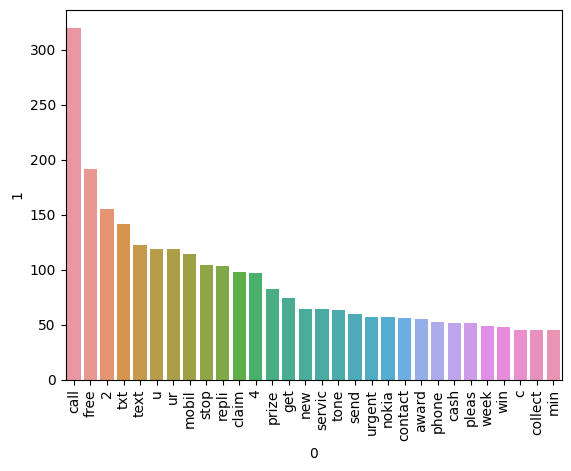

In [196]:
f = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=f[0], y=f[1])
plt.xticks(rotation="vertical")
plt.show()

In [197]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [198]:
len(ham_corpus)

35404

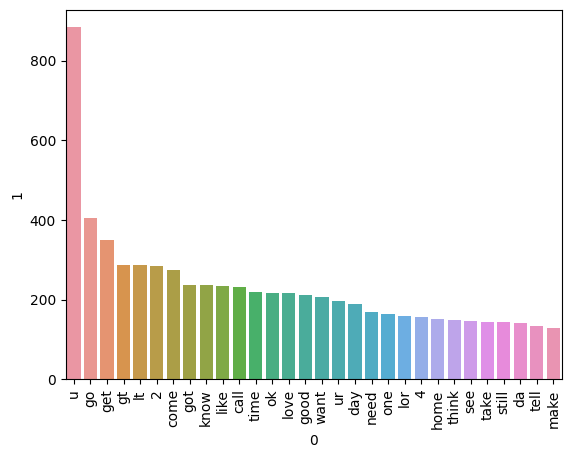

In [199]:
f = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=f[0], y=f[1])
plt.xticks(rotation="vertical")
plt.show()

## 4. Model Building

In [200]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [201]:
# Text Vectorization
# using Bag of Words


In [202]:
df['transformed_text'] = df['transformed_text'].apply(lambda x : " ".join(x))

In [203]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [204]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [205]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [206]:
X.shape

(5169, 6708)

In [207]:
y = df['target'].values

In [208]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [211]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [212]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [214]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [215]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [216]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [218]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [219]:
X.shape

(5169, 6708)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [221]:
def try_algo(algo):
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(precision_score(y_test, y_pred))

In [222]:
try_algo(gnb)

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [223]:
try_algo(mnb)

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [224]:
try_algo(bnb)

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


tfidf ->> mnb

is the best

because, when building spam classifier, we don't want False Positives

email being not spam but declared as spam by the system

### Trying other algorithms

In [229]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [231]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [246]:
clfs = {
    'SVC': svc,
    "KN": knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [247]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [248]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [249]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [263]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [264]:
performance_df.sort_values('Accuracy',  inplace=True, ascending=False)

In [265]:
performance_df.sort_values('Precision',  inplace=True, ascending=False)

In [266]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.971954,1.000000
2,NB,0.959381,1.000000
1,KN,0.900387,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


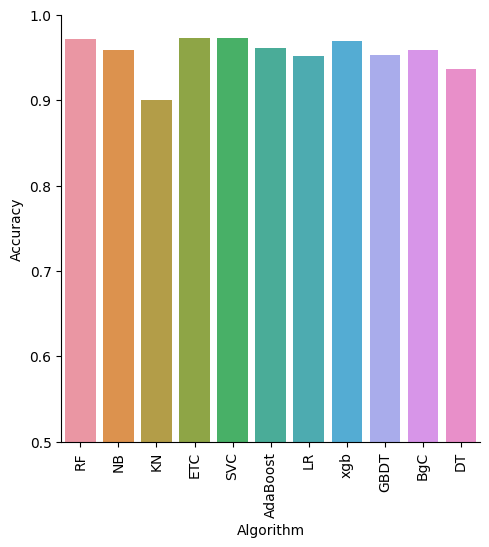

In [267]:
sns.catplot(x="Algorithm", y="Accuracy", data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

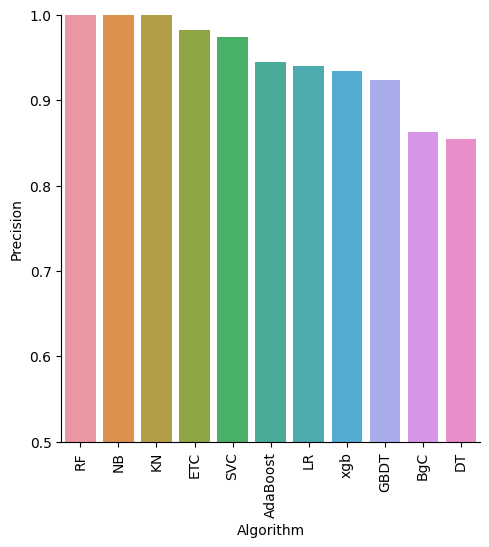

In [268]:
sns.catplot(x="Algorithm", y="Precision", data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

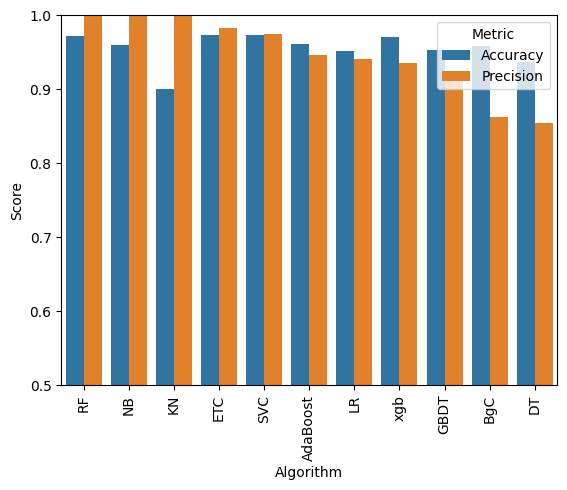

In [269]:
# Combine the 'Accuracy' and 'Precision' columns into a single DataFrame for plotting
combined_df = pd.concat([performance_df['Algorithm'], performance_df['Accuracy'], performance_df['Precision']], axis=1)

# Melt the DataFrame to convert 'Accuracy' and 'Precision' columns into a single 'Metric' column
melted_df = combined_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plot the combined bar graph
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=melted_df)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()